In [1]:
from policy_gradients import run
from policy_gradients_baseline import run_with_baseline, run_actor_critic
import pickle

Instructions for updating:
non-resource variables are not supported in the long term
tf_ver:2.10.0


In [4]:
policy_results = []
for i in range(10):
    policy_results.append(run())

 25%|██▌       | 1272/5000 [07:42<22:36,  2.75it/s]


In [5]:
with open('policy_results.pkl', 'wb') as f:
    pickle.dump(policy_results, f)


In [ ]:
policy_baseline_results = []
for i in range(10):
    policy_baseline_results.append(run_with_baseline())

In [ ]:
with open('policy_baseline_results.pkl', 'wb') as f:
    pickle.dump(policy_baseline_results, f)

In [2]:
policy_actor_critic_results = []
for i in range(10):
    policy_actor_critic_results.append(run_actor_critic())

 32%|███▏      | 1621/5000 [03:12<05:39,  9.94it/s]

In [ ]:
with open('policy_actor_critic_results.pkl', 'wb') as f:
    pickle.dump(policy_actor_critic_results, f)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [2]:
# load the results
with open('policy_results.pkl', 'rb') as f:
    policy_results = pickle.load(f)

with open('policy_baseline_results.pkl', 'rb') as f:
    policy_baseline_results = pickle.load(f)

with open('policy_actor_critic_results.pkl', 'rb') as f:
    policy_actor_critic_results = pickle.load(f)


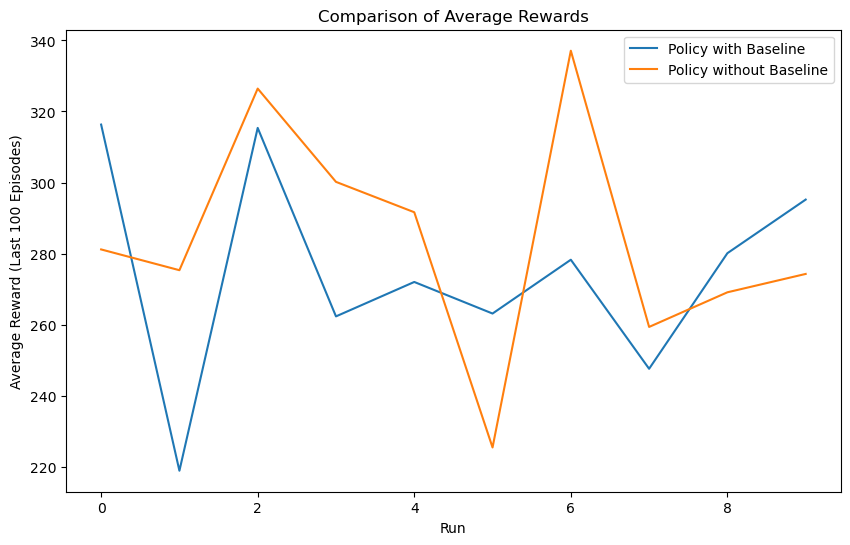

In [3]:
def plot_average_rewards(results_list_baseline, results_list_policy):
    rewards_baseline = [np.mean(result['Reward'][-100:]) for result in results_list_baseline]
    rewards_policy = [np.mean(result['Reward'][-100:]) for result in results_list_policy]
    
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_baseline, label='Policy with Baseline')
    plt.plot(rewards_policy, label='Policy without Baseline')
    plt.xlabel('Run')
    plt.ylabel('Average Reward (Last 100 Episodes)')
    plt.title('Comparison of Average Rewards')
    plt.legend()
    plt.show()

plot_average_rewards(policy_baseline_results, policy_results)


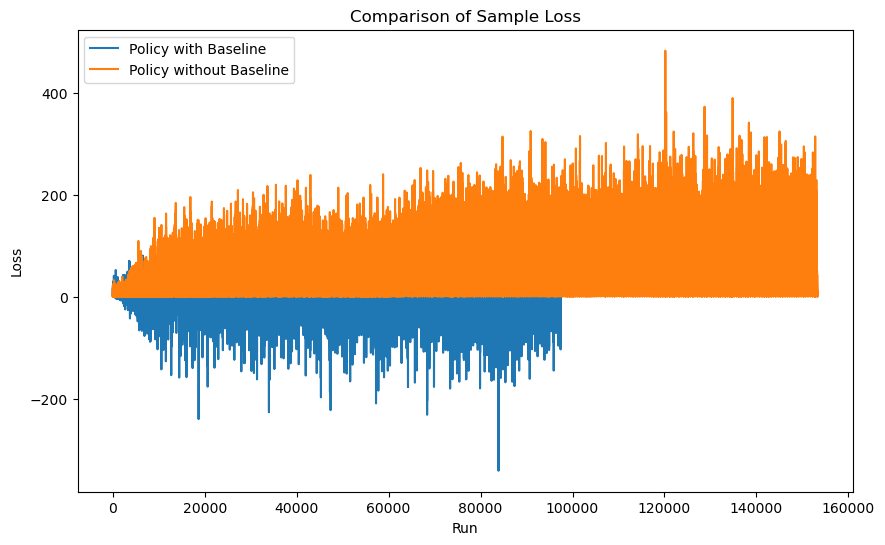

In [15]:
def plot_sample_loss(results_list_baseline, results_list_policy, loss_key='Loss'):
    losses_baseline = results_list_baseline[1][loss_key]     
    losses_policy = results_list_policy[1][loss_key]

    
    plt.figure(figsize=(10, 6))
    plt.plot(losses_baseline, label='Policy with Baseline')
    plt.plot(losses_policy, label='Policy without Baseline')
    plt.xlabel('Run')
    plt.ylabel('Loss')
    plt.title(f'Comparison of Sample {loss_key}')
    plt.legend()
    plt.show()

plot_sample_loss(policy_baseline_results, policy_results)



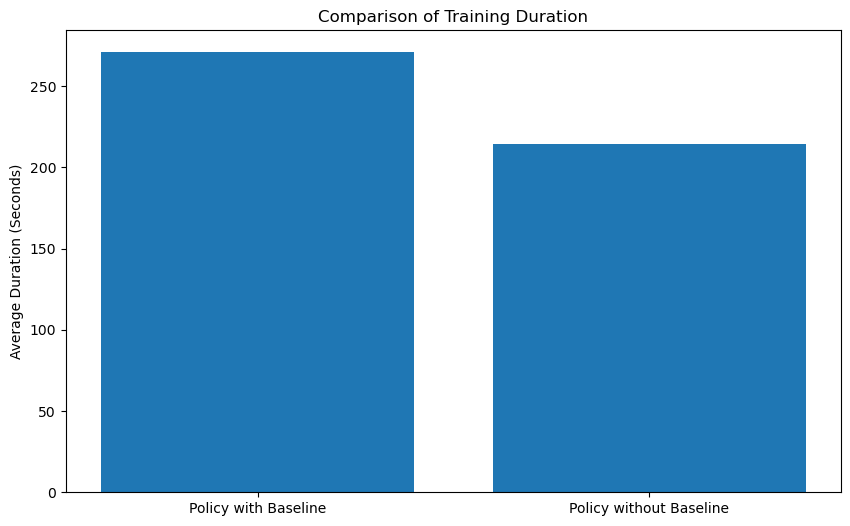

In [17]:
def plot_training_duration(results_list_baseline, results_list_policy):
    durations_baseline = [result['Duration'] for result in results_list_baseline]
    durations_policy = [result['Duration'] for result in results_list_policy]
    
    plt.figure(figsize=(10, 6))
    plt.bar(['Policy with Baseline', 'Policy without Baseline'], [np.mean(durations_baseline), np.mean(durations_policy)])
    plt.ylabel('Average Duration (Seconds)')
    plt.title('Comparison of Training Duration')
    plt.show()

plot_training_duration(policy_baseline_results, policy_results)


In [5]:
def average_duration(results_list):
    durations = [result['Duration'] for result in results_list]
    return np.mean(durations)

print("Average training duration (Policy with Baseline):", average_duration(policy_baseline_results))
print("Average training duration (Policy without Baseline):", average_duration(policy_results))


Average training duration (Policy with Baseline): 270.8574698448181
Average training duration (Policy without Baseline): 214.25177726745605


In [6]:
def average_solved_episode(results_list):
    solved_episodes = [result['Solved'] for result in results_list if result['Solved'] != -1]
    return np.mean(solved_episodes) if solved_episodes else None

print("Average solved episode (Policy with Baseline):", average_solved_episode(policy_baseline_results))
print("Average solved episode (Policy without Baseline):", average_solved_episode(policy_results))


Average solved episode (Policy with Baseline): 567.3
Average solved episode (Policy without Baseline): 881.8


In [7]:
def average_reward(results_list, last_n_episodes=100):
    all_rewards = np.concatenate([result['Reward'][-last_n_episodes:] for result in results_list])
    return np.mean(all_rewards)

print("Average reward over last 100 episodes (Policy with Baseline):", average_reward(policy_baseline_results))
print("Average reward over last 100 episodes (Policy without Baseline):", average_reward(policy_results))


Average reward over last 100 episodes (Policy with Baseline): 274.907
Average reward over last 100 episodes (Policy without Baseline): 283.992


In [8]:
def average_loss(results_list, loss_key='Loss'):
    all_losses = np.concatenate([result[loss_key] for result in results_list])
    return np.mean(all_losses)

print("Average policy loss (Policy with Baseline):", average_loss(policy_baseline_results))
print("Average policy loss (Policy without Baseline):", average_loss(policy_results))

# If using a baseline, also compute its loss
if 'LossV' in policy_baseline_results[0]:
    print("Average value loss (Policy with Baseline):", average_loss(policy_baseline_results, 'LossV'))


Average policy loss (Policy with Baseline): 0.5632921
Average policy loss (Policy without Baseline): 40.741302
Average value loss (Policy with Baseline): 521.1394


In [9]:
def consistent_solve_episode(results_list, threshold=475):
    episodes = [result['Episode'][i] for result in results_list for i, avg in enumerate(result["Average_100"]) if avg >= threshold]
    return np.mean(episodes) if episodes else None

print("Consistently solved episode (Policy with Baseline):", consistent_solve_episode(policy_baseline_results))
print("Consistently solved episode (Policy without Baseline):", consistent_solve_episode(policy_results))


Consistently solved episode (Policy with Baseline): 567.3
Consistently solved episode (Policy without Baseline): 881.8
